# Lab 2

Topics:
* Intervention (the do-operator)
* Backdoor adjustment

This week, let's start with a simple example where the difference between conditioning and intervening is extreme. Then, we'll return to the drug efficacy example from last week where the difference is more subtle.

### **Example (Altitude and temperature)**

Consider a simple SCM with two variables: $A$ (altitude) and $T$ (temperature). We can collect a dataset by recording the altitude and average temperature in many cities across the world. Does it make more sense for altitude to cause temperature, or temperature to cause altitude?

If temperature causes altitude ($T \rightarrow A$), the causal factorization is
\begin{align*}
p(a, t) = p(t \mid \text{pa}(t)) p(a \mid \text{pa}(a)) = p(t) p(a \mid t).
\end{align*}
In contrast, if altitude causes temperature ($A \rightarrow T$), it's
\begin{align*}
p'(a, t) = p'(a \mid \text{pa}(a)) p'(t \mid \text{pa}(t)) = p'(a) p'(t \mid a).
\end{align*}

If our goal is to create a statistical model and estimate its parameters via maximum likelihood, the two models are equivalent since
\begin{align*}
p(a, t) = p(t \mid a) p(a) = p'(a \mid t) p'(t) = p'(a, t).
\end{align*}

However, the difference becomes clear with a causal model, where we can consider the effect of interventions. Let's start with the first model, where temperature causes altitude.

**Temperature causes altitude**

In [3]:
import os
import requests

def download_from_url(url, filename, overwrite=False):
    if os.path.exists(filename) and not overwrite:
        return
        
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

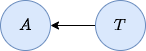

In [4]:
# if `temperature_causes_altitude.png` does not exist, download it from `https://nyu.box.com/shared/static/gqxcnyh2ujk0t8pp0h71xkxyy9pyu2tw.png`.
# display the image using IPython.display.Image.
download_from_url('https://nyu.box.com/shared/static/gqxcnyh2ujk0t8pp0h71xkxyy9pyu2tw.png', 'temperature_causes_altitude.png')

from IPython.display import Image
Image('temperature_causes_altitude.png')

The SCM is
\begin{align*}
&t \leftarrow \epsilon_t\\
&a \leftarrow f_a(t, \epsilon_a).
\end{align*}
Consider the intervention distribution $p(a \mid do(t))$. This is the distribution of altitude when we fix the temperature to some value. Hypothetically, we can fix the temperature by creating a dome around each city and installing a city-wide AC system. Clearly, this would not affect the altitude. Therefore, it doesn't seem like temperature causes altitude. Now let's consider the other model.

**Altitude causes temperature**

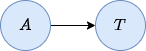

In [5]:
# if `altitude_causes_temperature.png` does not exist, download it from `https://nyu.box.com/shared/static/o4hv6izl45be797aw5v3ln2qjaudz4z5.png`.
# display the image using IPython.display.Image.
download_from_url('https://nyu.box.com/shared/static/o4hv6izl45be797aw5v3ln2qjaudz4z5.png', 'altitude_causes_temperature.png')

Image('altitude_causes_temperature.png')

The SCM is
\begin{align*}
&a \leftarrow \epsilon_a\\
&t \leftarrow f_t(a, \epsilon_t).
\end{align*}
The intervention distribution is $p(t \mid do(a))$. This is the distribution of temperature when we fix the altitude to some value. Hypothetically, we can do this by creating an elevator-like mechanism under each city so that we can control its altitude. If we use this to elevate a city above the clouds, this would decrease the temperature. Therefore, we conclude that altitude causes temperature, and this latter model is correct.

**Conditioning vs. intervening**

This example illustrates the fundamental difference between conditioning and intervening. If we use our dataset to estimate the conditional distribution $p(a \mid t = t_\text{low})$, we select the cities with a low temperature, and their altitudes will tend to be high. In contrast, if we intervene to create a dome and city-wide AC system, this does not change the altitude. With this difference in mind, let's return to last week's drug efficacy example where the difference between conditioning and intervening is more realistic and subtle.

### **Example (Drug efficacy)**

Recall there are three variables:
1. $X \in \{0, 1\}$: whether the patient is elderly
2. $A \in \{0, 1\}$: whether the patient took the drug
3. $Y \in \{0, 1\}$: whether the patient recovered

The SCM is
\begin{align*}
&X \leftarrow H(\epsilon_X)\\
&A \leftarrow H(X  + \epsilon_A)\\
&Y \leftarrow H(0.25 A - X + \epsilon_Y),
\end{align*}
where $H$ is the Heaviside step function and all $\epsilon$'s are standard normal. We show the graph below.

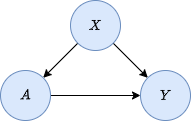

In [7]:
download_from_url('https://nyu.box.com/shared/static/7oxpdy3dkqbzv3v3xw0zx22ooc2xyvzh.png', 'drug_efficacy_graph.png')
Image('drug_efficacy_graph.png')

Last week, we asked the following statistical question.

> Was the recovery rate higher for patients who were prescribed the drug?

Mathematically, this condition is true when
\begin{align*}
P(Y = 1 \mid A = 1) > P(Y = 1 \mid A = 0).
\end{align*}

It turned out that elderly patients were (i) more likely to be prescribed the drug, and (ii) less likely to recover. Therefore, age was confounding the relationship between treatment and recovery.

This week, we'll ask the following causal question.

> If we administer the drug to a patient, are they more likely to recover?

This condition is true when
\begin{align*}
P(Y = 1 \mid do(A = 1)) > P(Y = 1 \mid do(A = 0)).
\end{align*}

Let $G$ denote the original graph. Here's the thought process for calculating $P_G(Y = 1 \mid do(A = a))$.

**Step 1.** Graphically, when we intervene on a variable we remove its incoming edges. In our context, we remove the edges from $X$ to $A$, resulting in $G'$ below.

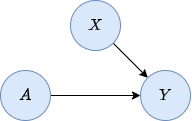

In [8]:
download_from_url('https://nyu.box.com/shared/static/8st4wka75tjakjfyi79j7imqtygt8m2q.png', 'drug_efficacy_intervention.png')
Image('drug_efficacy_intervention.png')

$P_{G'}(A, X, Y)$ is a modified joint distribution in which $A$ and $X$ are independent. In our case, this means that whether or not someone took the drug is unrelated to their age group. One way this would be true is if we administered the treatment randomly. Another is if we forced everyone to take the drug.

**Step 2.** We are going to use the fact that
\begin{align*}
P_G(Y = 1 \mid do(A = a)) = P_{G'}(Y = 1\mid A = a).
\end{align*}

Let's start by writing the causal factorization of the right-hand side, i.e.
\begin{align*}
P_{G'}(Y = 1 \mid A = a) &= \sum_x P_{G'}(Y = 1, X = x \mid A = a)\\
&= \sum_x P_{G'}(Y = 1 \mid A = a, X = x) P_{G'}(X = x \mid A = a)\\
&= \sum_x P_{G'}(Y = 1 \mid A = a, X = x) P_{G'}(X = x).
\end{align*}
In the last line, we used the fact that $X$ and $A$ are marginally independent in $G'$.

**Step 3.** In Step 2, we wrote $P_G(Y = 1 \mid do(A = a))$ in terms of $P_{G'}$. However, we cant estimate any of these quantities because we don't have data from $P_{G'}$. Instead, our data is from $P_G$, so we need to rewrite the above expressions in terms of $P_G$.

Here, we use the fact that intervening on $A$ does not change the functional assighnments for $X$ or $Y$, i.e.
\begin{align*}
P_G(X) &= P_{G'}(X),\\
P_G(Y \mid X, A) &= P_{G'}(Y \mid X, A).
\end{align*}

We can use this to complete Step 3 by writing
\begin{align*}
P_G(Y = 1 \mid do(A = a)) &= P_{G'}(Y = 1 \mid A = a)\\
&= \sum_x P_{G'}(Y = 1 \mid A = a, X = x) P_{G'}(X = x)\\
&= \sum_x P_G(Y = 1 \mid A = a, X = x) P_G(X = x).
\end{align*}
**To summarize, we have written $P_G(Y = 1 \mid do(A = a))$ in terms of conditional probabilities that we can estimate from data.**

Let's use the code from Lab 1 to calculate these probabilities.

In [9]:
import numpy as np
import pandas as pd

def to_binary(x):
    return (x > 0).astype(int)

rng = np.random.RandomState(0)
n_examples = 1000
epsilon_x = rng.randn(n_examples)
epsilon_a = rng.randn(n_examples)
epsilon_y = rng.randn(n_examples)

x_to_a = 1
a_to_y = 0.25
x_to_y = -1

x = to_binary(epsilon_x)
a = to_binary(x_to_a * x + epsilon_a)
y = to_binary(a_to_y * a + x_to_y * x + epsilon_y)
df = pd.DataFrame({
    'X': x,
    'A': a,
    'Y': y
})

for x in range(2):
  for a in range(2):
    print(f'P(Y = 1 | X = {x}, A = {a}) = {df.Y[(df.X == x) & (df.A == a)].mean():.3f}')

print(f'P(X = 0) = {1 - df.X.mean()}')
print(f'P(X = 1) = {df.X.mean()}')

P(Y = 1 | X = 0, A = 0) = 0.467
P(Y = 1 | X = 0, A = 1) = 0.628
P(Y = 1 | X = 1, A = 0) = 0.127
P(Y = 1 | X = 1, A = 1) = 0.202
P(X = 0) = 0.524
P(X = 1) = 0.476


We have
\begin{align*}
P_G(Y = 1 \mid do(A = 0)) &= P_G(Y = 1 \mid A = 0, X = 0) P_G(X = 0) + P_G(Y = 1 \mid A = 0, X = 1) P_G(X = 1) = \color{blue}{0.467} * 0.524 + \color{red}{0.127} * 0.476 = 0.305,\\
P_G(Y = 1 \mid do(A = 1)) &= P_G(Y = 1 \mid A = 1, X = 0) P_G(X = 0) + P_G(Y = 1 \mid A = 1, X = 1) P_G(X = 1) = \color{blue}{0.628} * 0.524 + \color{red}{0.202} * 0.476 = 0.425.\\
\end{align*}

Since
\begin{align*}
P_G(Y = 1 \mid do(A = 1)) > P_G(Y = 1 \mid do(A = 0)),
\end{align*}
we conclude that the drug is effective.

Let's compare this to $P_G(Y = 1 \mid A = a)$, which we calculated in Lab 1, i.e.
\begin{align*}
P_G(Y = 1 \mid A = a) = \sum_x P_G(Y = 1 \mid A = a, X = x) P_G(X = x \mid A = a).
\end{align*}

The values were
\begin{align*}
P_G(Y = 1 \mid A = 0) = \color{blue}{0.467} * 0.763 + \color{red}{0.127} * 0.237 = 0.386,\\
P_G(Y = 1 \mid A = 1) = \color{blue}{0.628} * 0.404 + \color{red}{0.202} * 0.596 = 0.374.
\end{align*}

This shows that by intervening on $A$, we replaced $P_G(X = x \mid A = a)$ with $P_G(X = x)$, where the latter does not consider the fact that elderly patients tend to be prescribed the drug more often.


### **The Principle of Independent Mechanisms**

To recap, we expressed $P_G(Y = 1 \mid do(A = 1))$ in terms of conditional distributions w.r.t. $P_{G'}$, and used
\begin{align*}
P_G(X) &= P_{G'}(X),\\
P_G(Y \mid X, A) &= P_{G'}(Y \mid X, A).
\end{align*}
to get the desired probability w.r.t. $P_G$.

This reflects the assumption that functional assignments in SCMs can change without affecting the others. This is called the Principle of Independent Mechanisms. In this case, intervening on $A$ did not change the functional assignments for $X$ or $Y$.

In the altitude and temperature example, we can change the marginal distribution of altitude $P(A)$ without changing $P(T \mid A)$, which is a property of nature.